# TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

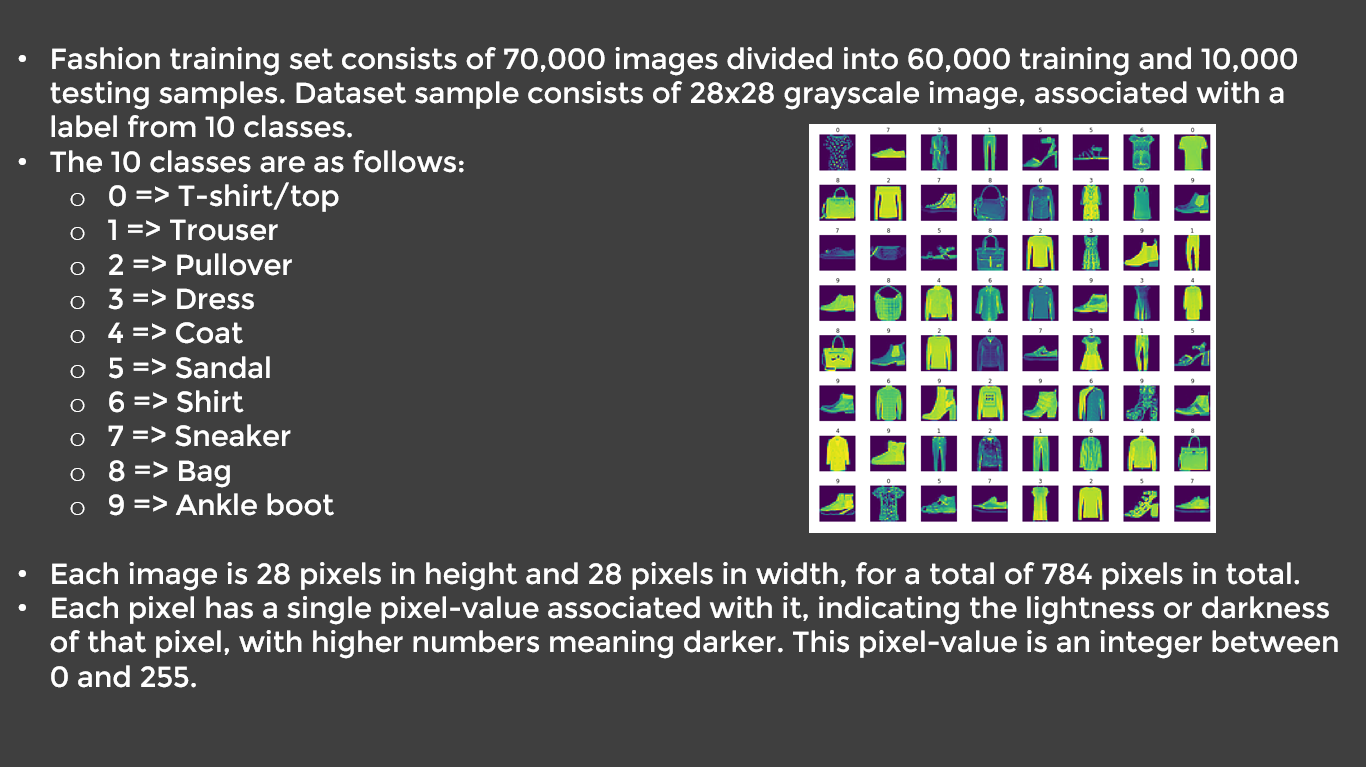

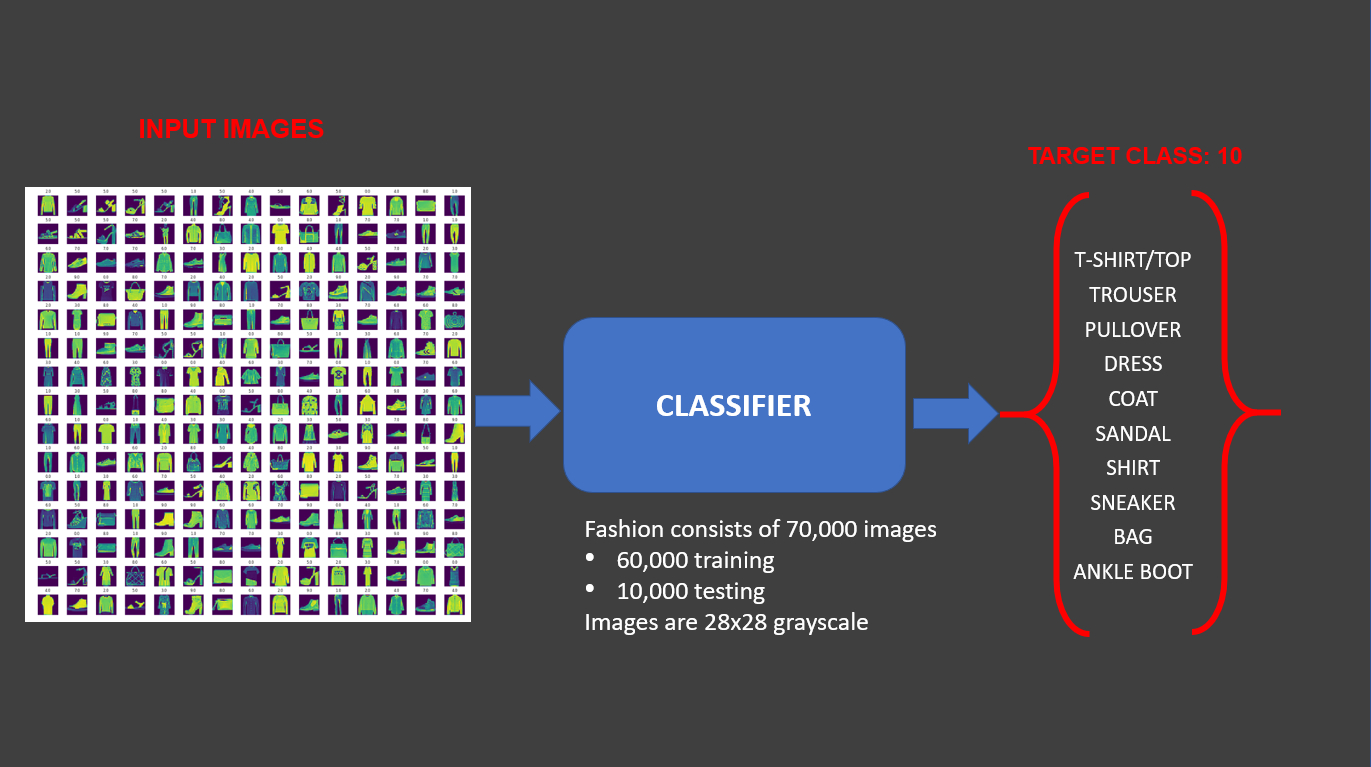

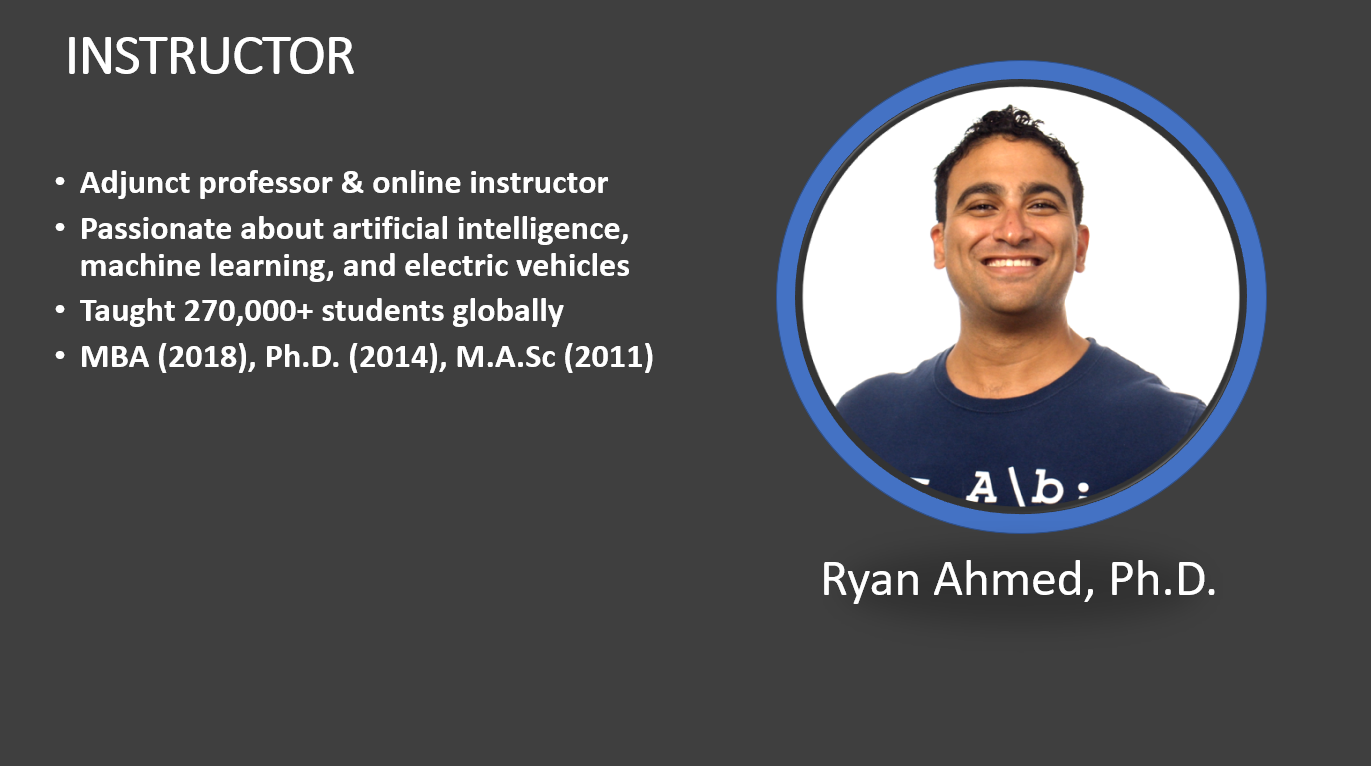

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import matplotlib.pyplot as plt
import csv

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Use the same dataset made readily available by keras Using the following lines of code:
train_df = 'fashion-mnist_train.csv'
test_df = 'fashion-mnist_test.csv'

In [4]:
def parse_data_from_input(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')    
        imgs = []
        labels = []
        next(reader, None)
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

X_train, y_train = parse_data_from_input(train_df)
X_test, y_test = parse_data_from_input(test_df)

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

**PRACTICE OPPORTUNITY #1:**
- **Check out the sizes of both training and testing datasets**

# TASK #3: PERFORM DATA VISUALIZATION

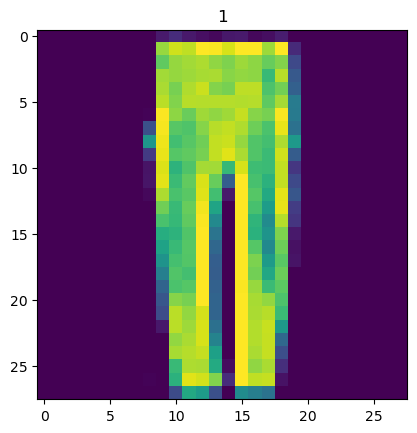

In [7]:
# Select a sample image and visualize it
i = 69
plt.imshow(X_train[i])
plt.title(y_train[i].argmax())
plt.show()

In [8]:
print(y_train[20].argmax())

8


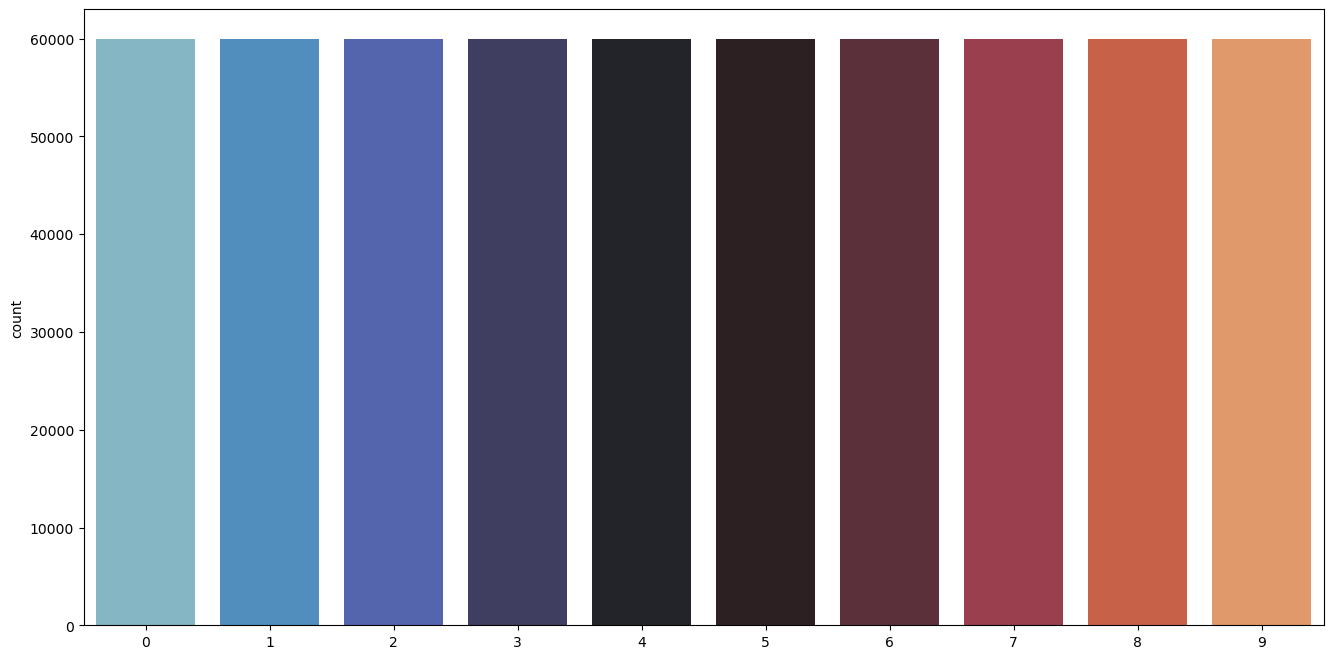

In [9]:
# Visualize the distribution of the every class
plt.figure(figsize=(16,8))
sns.countplot(y_train, palette="icefire")
plt.show()

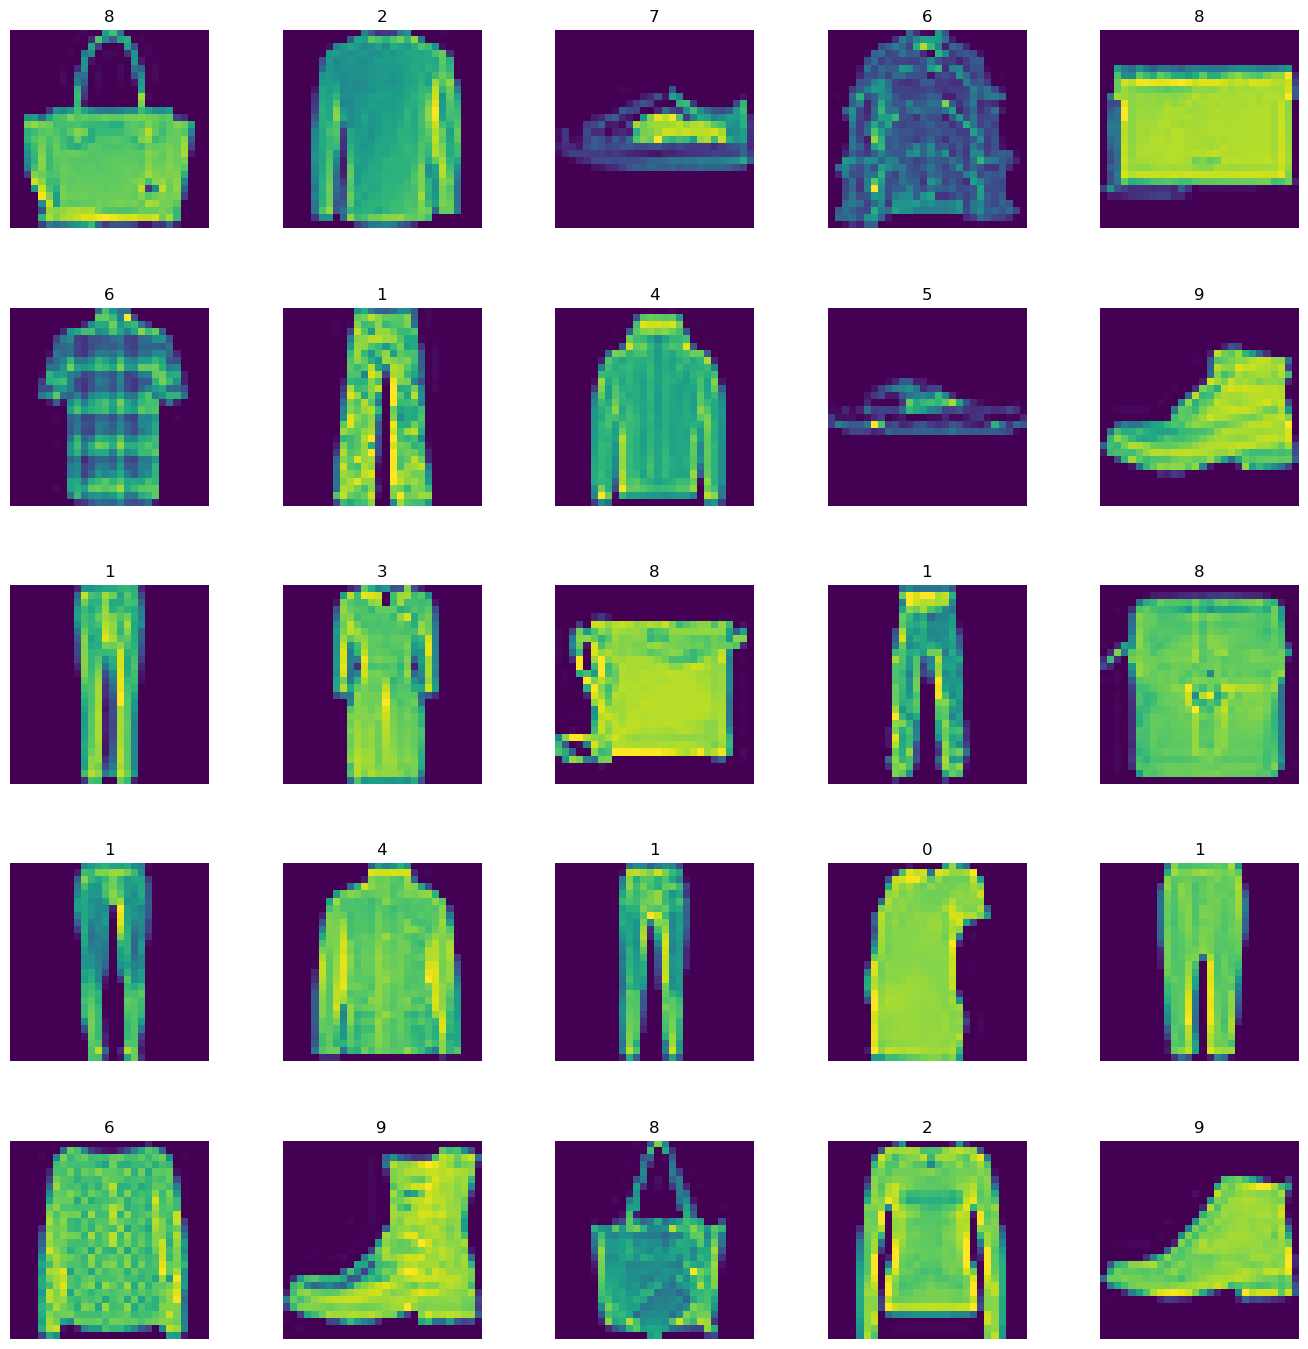

In [10]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# Let's visualize some of the images in the dataset
# We will visualize the first 50 images in the dataset
W_grid = 5
L_grid = 5

# plot them with the corresponding labels
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables
    plt.subplot(5, 5, i+1)
    index = np.random.randint(0, n_training)
    plt.imshow(X_train[index])
    plt.title(y_train[index].argmax())
    plt.axis('off')
plt.subplots_adjust(hspace=0.4)

**PRACTICE OPPORTUNITY #2:**
- **Plot a grid containing 144 images and perform a sanity check on the data** 

# TASK #4: PREPARE THE DATA FOR TRAINING

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000, 10)

In [13]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
X_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [15]:
# y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
# X_train = np.expand_dims(X_train, axis=-1)

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# TASK #5: BUILD A DEEP LEARNING MODEL

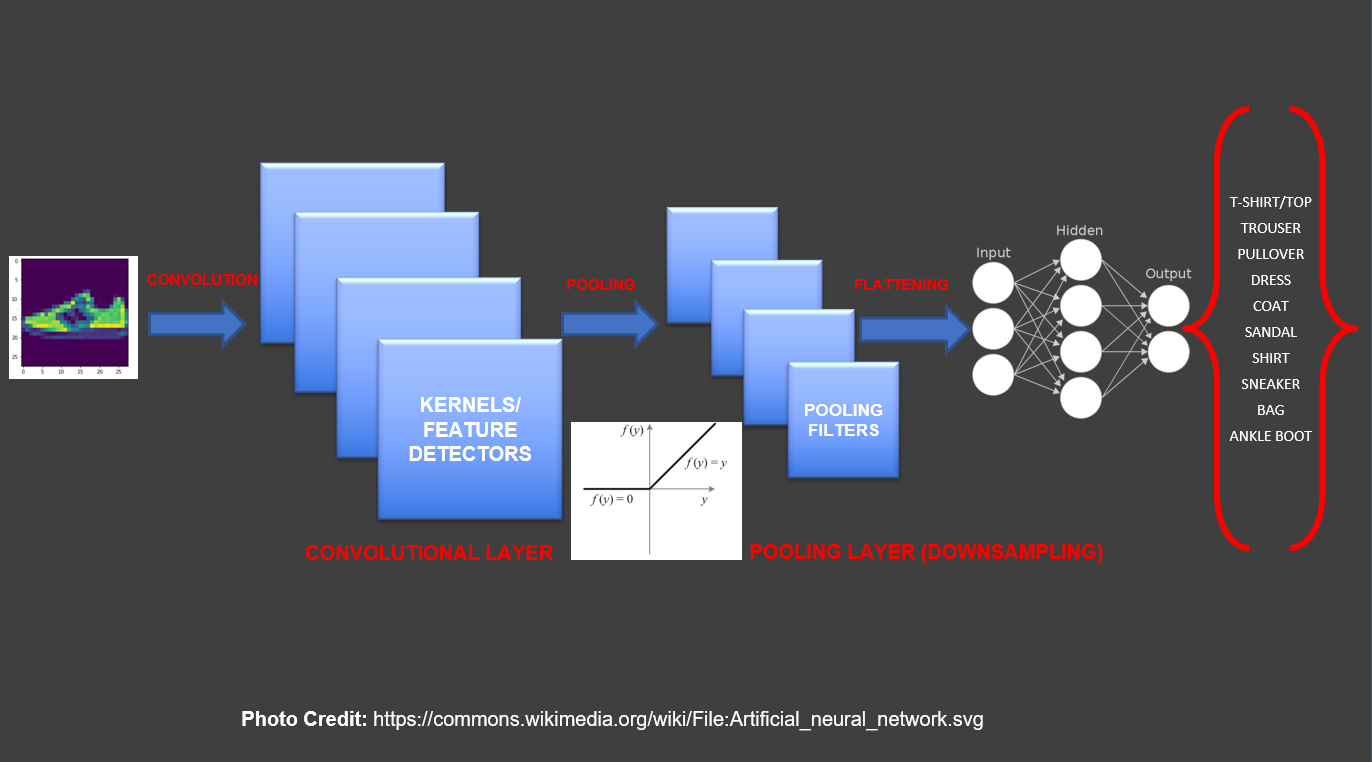

In [20]:
from tensorflow.keras import datasets, layers, models
import keras_tuner
from tensorflow import keras
from livelossplot import PlotLossesKeras

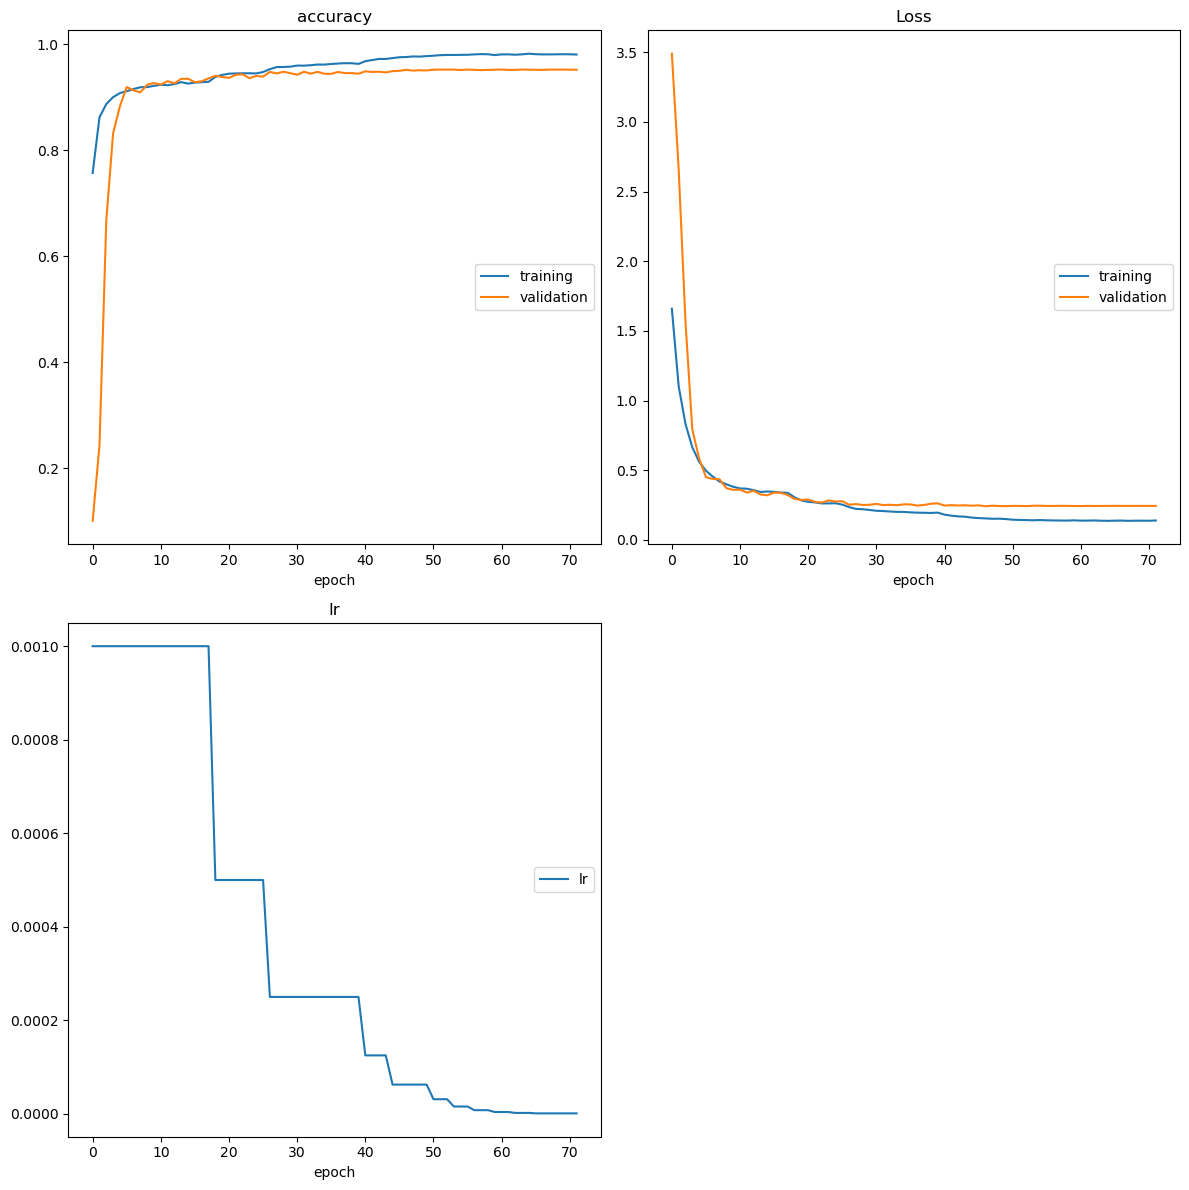

accuracy
	training         	 (min:    0.757, max:    0.982, cur:    0.980)
	validation       	 (min:    0.101, max:    0.952, cur:    0.952)
Loss
	training         	 (min:    0.137, max:    1.660, cur:    0.140)
	validation       	 (min:    0.242, max:    3.490, cur:    0.245)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
117/117 [==============================] - 2s 16ms/step - loss: 0.1396 - accuracy: 0.9803 - val_loss: 0.2445 - val_accuracy: 0.9516 - lr: 1.0000e-06
Epoch 72: early stopping


In [28]:
# Test Loss: 0.2327
# Test Accuracy: 0.9517


model = models.Sequential()

model.add(layers.InputLayer(input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.3))

model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

model.summary()

# TASK #6: COMPILE AND TRAIN A DEEP LEARNING MODEL

In [ ]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_{val_accuracy:.3f}.h5', 
                                                monitor='val_accuracy', 
                                                verbose=1, 
                                                save_best_only=True)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='min', restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                factor=0.5, 
                                                patience=3, 
                                                verbose=1,
                                                min_lr=0.000001)

callbacks = [#checkpoint,
            earlystop,
            reduce_lr,
            PlotLossesKeras()]

In [ ]:
epochs = 500
batch_size = 512


history = model.fit(X_train, y_train,
            epochs=epochs, 
            validation_data=(X_test, y_test),
            callbacks=callbacks, 
            verbose=1, 
            shuffle=True, 
            validation_split=0.2,
            batch_size=batch_size,
            steps_per_epoch=X_train.shape[0]//batch_size,
            validation_steps=X_test.shape[0]//batch_size
            )

In [29]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss: {:.4f}'.format(score[0]))
print('Test Accuracy: {:.4f}'.format(score[1]))

Test Loss: 0.2399
Test Accuracy: 0.9518


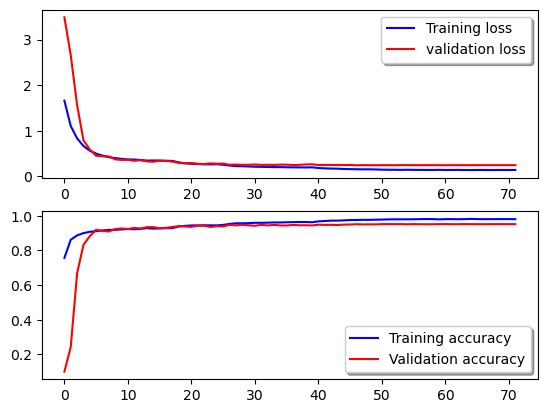

In [30]:
#plot the loss and accuracy curves for training and validation in a row
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [ ]:
X_test.shape

In [ ]:
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
X_test = X_test.astype('float')


In [ ]:
predicted_classes = model.predict(X_test)

In [ ]:
predicted_classes

In [ ]:
predicted_classes=np.argmax(predicted_classes,axis=1)


In [ ]:
predicted_classes

In [ ]:
y_test

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]

target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

In [ ]:
# plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)


**PRACTICE OPPORTUNITY #3:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

# GREAT JOB!

# PRACTICE OPPORTUNITIES SOLUTIONS 

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Check out the sizes of both training and testing datasets**

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot a grid containing 144 images and perform a sanity check on the data** 

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction = {:0.1f}\n True = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

In [ ]:
# from tensorflow.keras import datasets, layers, models
# cnn = models.Sequential()

# cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)  ))
# cnn.add(layers.MaxPooling2D(2,2))

# cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
# cnn.add(layers.MaxPooling2D(2,2))

# cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))

# cnn.add(layers.Flatten())

# cnn.add(layers.Dense(64, activation = 'relu'))
# cnn.add(layers.Dense(1000, activation = 'relu'))
# cnn.add(layers.Dense(10, activation = 'softmax'))
# cnn.summary()